# Example Jupyter Notebook for computational chemistry teaching.

## Stage 1. Introduction to python.

In [1]:
3 + 8

11

In [2]:
3**4

81

In [3]:
4*(7 - 2)

20

In [4]:
a = 2
b = 11
c = a + b
print(c)

13


In [5]:
# Long-hand addition
a = 1
a = a + 4
print(a)

# Short-hand addition
a = 1
a += 4
print(a)

5
5


In [6]:
# for loops
for n in range(4):
    print("----")
    print(n, n**2)

----
0 0
----
1 1
----
2 4
----
3 9


In [7]:
# if statements
x = -10.0  # Initial x value

if x > 0.0:  
    print('Initial x is greater than zero')
    x -= 20.0
elif x < 0.0:  
    print('Initial x is less than zero')
    x += 21.0
else: 
    print('Initial x is not less than zero and not greater than zero, therefore it must be zero')
    x *= 2.5

# Print new x value
print("New x value:", x)

Initial x is less than zero
New x value: 11.0


##### To add: lots more examples, functions, arrays, etc.
##### See https://github.com/CambridgeEngineering/PartIA-Computing-Michaelmas
##### Potential projects include Monte Carlo simulations of LJ spheres: http://jose.theoj.org/papers/58daa1a1a564dc8e0f99ffcdae20eb1d
#####  

## Stage 2. Introduction to computational medicinal chemistry.

##### See https://jcheminf.biomedcentral.com/articles/10.1186/s13321-019-0351-x
##### E.g. ChEMBL, molecular properties/filtering, ligand-based screening, pharmacophores, PDB 

In [8]:
# The majority of the basic molecular functionality is found in module rdkit.Chem library
from rdkit import Chem
from rdkit.Chem import AllChem

In [9]:
# Individual molecules can be constructed using a variety of approaches
# FDA approved EGFR inhibitors: Gefitinib, Erlotinib

mol1 = Chem.MolFromSmiles('COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1')
mol2 = Chem.MolFromSmiles('C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1')

In [10]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

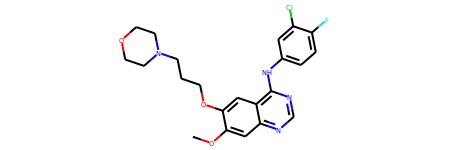

In [11]:
# Single molecule
mol1

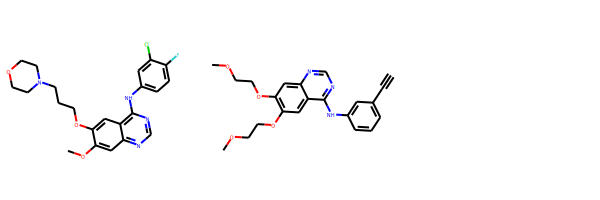

In [12]:
# List of molecules
Draw.MolsToGridImage([mol1,mol2], useSVG=True)

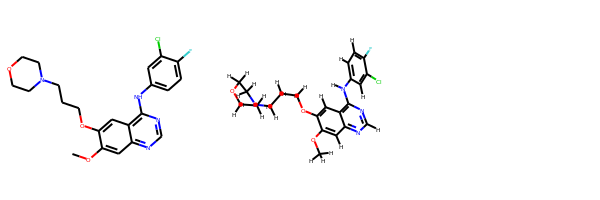

In [13]:
m_3D = Chem.AddHs(mol1)
AllChem.EmbedMolecule(m_3D)
#AllChem.UFFOptimizeMolecule(m_3D) # Improves the quality of the conformation; this step should not be necessary since v2018.09: default conformations use ETKDG
Draw.MolsToGridImage([mol1,m_3D])

In [14]:
from rdkit.Chem import Descriptors


In [15]:
print ('Heavy atoms:', Descriptors.HeavyAtomCount(mol1))
print ('H-bond donors:', Descriptors.NumHDonors(mol1))
print ('H-bond acceptors:', Descriptors.NumHAcceptors(mol1))
print ('Molecular weight:', Descriptors.MolWt(mol1))
print ('LogP:', Descriptors.MolLogP(mol1))

Heavy atoms: 31
H-bond donors: 1
H-bond acceptors: 7
Molecular weight: 446.9100000000004
LogP: 4.275600000000003


In [16]:
from simtk import openmm, unit
from simtk.openmm import app
import numpy as np

In [17]:
pdbfile = app.PDBFile('1ubq.pdb')
positions = pdbfile.getPositions()
topology = pdbfile.getTopology()

In [18]:
# Create an MDTraj Trajectory object
import mdtraj
mdtraj_topology = mdtraj.Topology.from_openmm(topology)
traj = mdtraj.Trajectory(positions/unit.nanometers, mdtraj_topology)
traj

<mdtraj.Trajectory with 1 frames, 660 atoms, 134 residues, without unitcells at 0x7fdc8cd0f0b8>

In [19]:
#topology.getUnitCellDimensions()
mdtraj_topology

<mdtraj.Topology with 2 chains, 134 residues, 660 atoms, 608 bonds at 0x7fdc8cbba908>

In [20]:
# Might need to enable Javascript (select 'Trusted' at the top of the page)
! jupyter nbextension enable --py --sys-prefix widgetsnbextension
! jupyter nbextension enable --py --sys-prefix nglview

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
Enabling notebook extension nglview-js-widgets/extension...
      - Validating: OK


In [21]:
# View it in nglview
import nglview

In [22]:
view = nglview.show_mdtraj(traj)
view

NGLWidget()

In [23]:
view.render_image()

Image(value=b'', width='99%')